**BM TASK : Samar Ibrahim Ali**

In [39]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,plot_confusion_matrix

In [40]:
#Importing Data
credits = pd.read_csv('kaggle/input/credit-card-approval-prediction/credit_record.csv')
app_records = pd.read_csv('kaggle/input/credit-card-approval-prediction/application_record.csv')

In [41]:
print('Records => ', app_records.shape)
print('Credits => ', credits.shape)

Records =>  (438557, 18)
Credits =>  (1048575, 3)


In [42]:
credits.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [43]:
app_records.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [44]:
app_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [45]:
app_records.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [46]:
app_records.isna().sum() #Check Columns That has Null Values

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [47]:
app_records.nunique() #Check Number of Unique Values of each column

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

# EDA

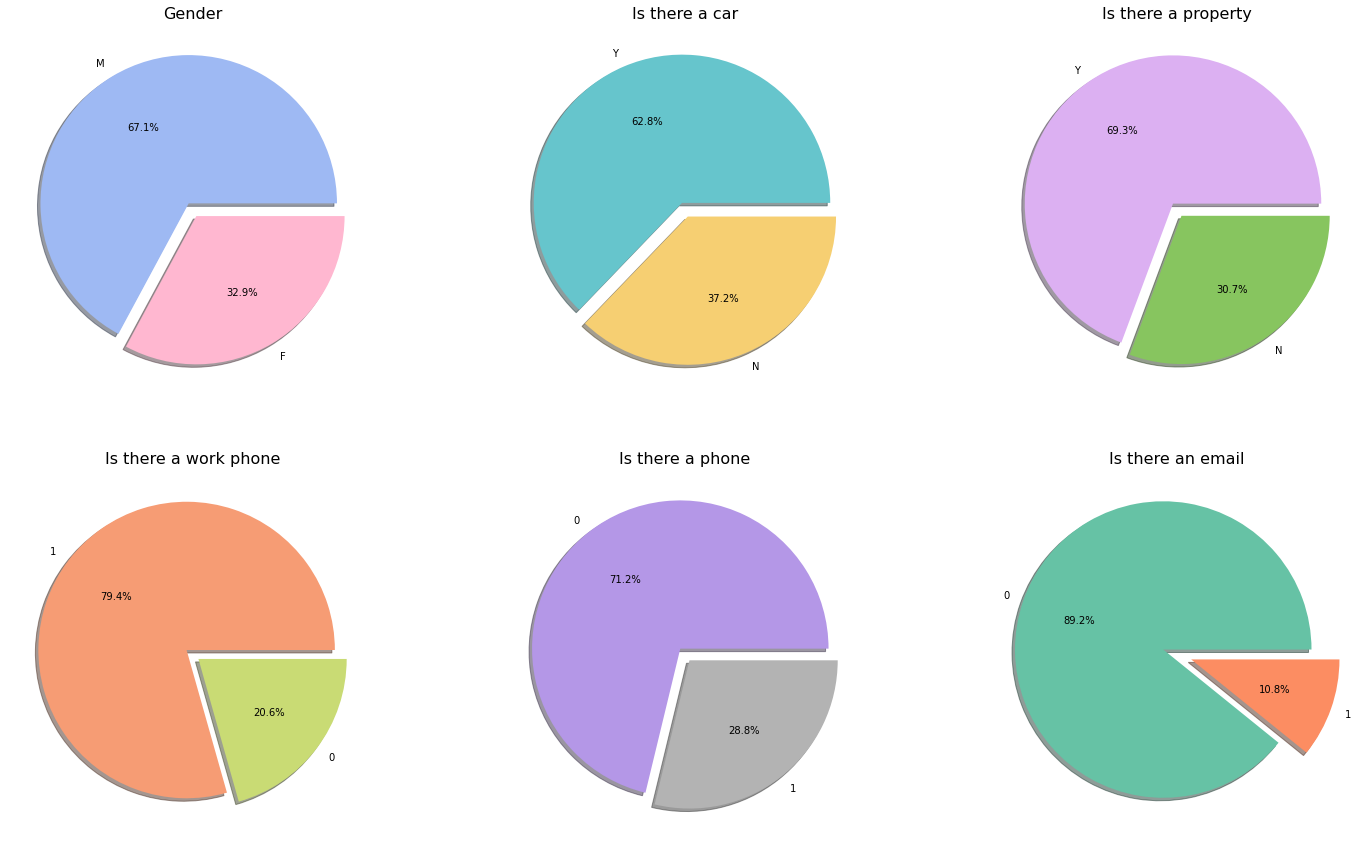

In [48]:
fig, axes = plt.subplots(2,3)
fig.set_size_inches(25,15)

axes[0][0].pie(app_records['CODE_GENDER'].value_counts(),labels= list(app_records['CODE_GENDER'].unique()), colors=["#9eb9f3","#ffb7d0"], explode=[0.05,0.05],autopct='%1.1f%%',shadow=True)
axes[0][0].set_title('Gender',fontsize = 16)

axes[0][1].pie(app_records['FLAG_OWN_CAR'].value_counts(),labels= list(app_records['FLAG_OWN_CAR'].unique()),colors=["#66c5cc","#f6cf72"], explode=[0.05,0.05],autopct='%1.1f%%',shadow=True)
axes[0][1].set_title('Is there a car',fontsize = 16)

axes[0][2].pie(app_records['FLAG_OWN_REALTY'].value_counts(),labels= list(app_records['FLAG_OWN_REALTY'].unique()), colors=["#dcb0f2","#87c55f"], explode=[0.05,0.05],autopct='%1.1f%%',shadow=True)
axes[0][2].set_title('Is there a property',fontsize = 16)

axes[1][0].pie(app_records['FLAG_WORK_PHONE'].value_counts(),labels= list(app_records['FLAG_WORK_PHONE'].unique()), colors=["#f69c74","#c9db74"], explode=[0.05,0.05],autopct='%1.1f%%',shadow=True)
axes[1][0].set_title('Is there a work phone',fontsize = 16)

axes[1][1].pie(app_records['FLAG_PHONE'].value_counts(),labels= list(app_records['FLAG_PHONE'].unique()),colors=["#b497e7","#b3b3b3"], explode=[0.05,0.05],autopct='%1.1f%%',shadow=True)
axes[1][1].set_title('Is there a phone',fontsize = 16)

axes[1][2].pie(app_records['FLAG_EMAIL'].value_counts(),labels= list(app_records['FLAG_EMAIL'].unique()), colors=["#66c2a5","#fc8d62"], explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
axes[1][2].set_title('Is there an email',fontsize = 16)

plt.show()

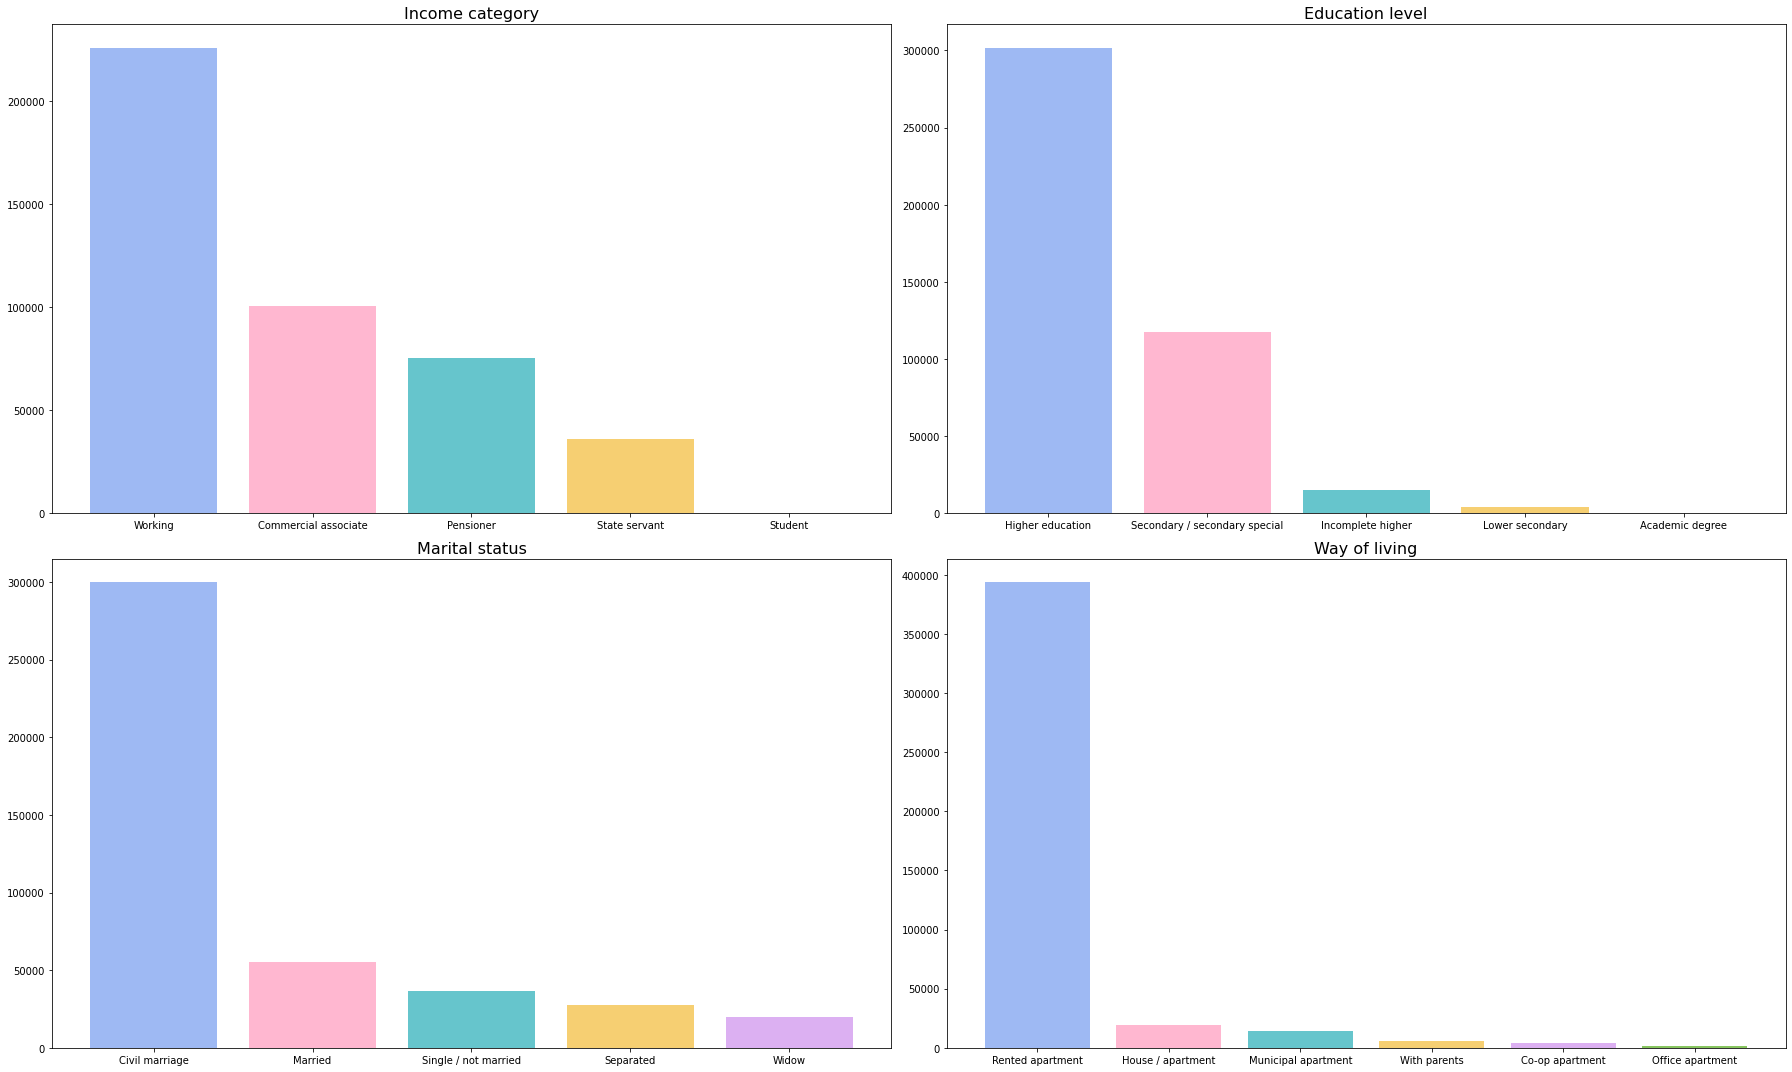

In [49]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(25,15)

colors = ["#9eb9f3","#ffb7d0","#66c5cc","#f6cf72","#dcb0f2","#87c55f"]

axes[0][0].bar(list(app_records['NAME_INCOME_TYPE'].unique()), app_records['NAME_INCOME_TYPE'].value_counts(),color=colors[:5])
axes[0][0].set_title('Income category',fontsize = 16)

axes[0][1].bar(list(app_records['NAME_EDUCATION_TYPE'].unique()), app_records['NAME_EDUCATION_TYPE'].value_counts(),color=colors[:5])
axes[0][1].set_title('Education level',fontsize = 16)


axes[1][0].bar(list(app_records['NAME_FAMILY_STATUS'].unique()), app_records['NAME_FAMILY_STATUS'].value_counts(),color=colors[:6])
axes[1][0].set_title('Marital status',fontsize = 16)

axes[1][1].bar(list(app_records['NAME_HOUSING_TYPE'].unique()), app_records['NAME_HOUSING_TYPE'].value_counts(),color=colors[:6])
axes[1][1].set_title('Way of living',fontsize = 16)

plt.tight_layout()
plt.show()

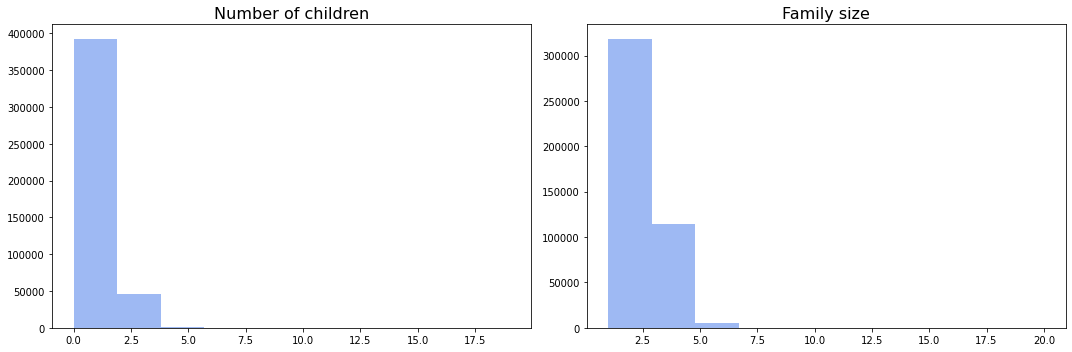

In [50]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,5)

axes[0].hist(app_records['CNT_CHILDREN'],color='#9eb9f3')
axes[0].set_title('Number of children',fontsize = 16)

axes[1].hist(app_records['CNT_FAM_MEMBERS'], color='#9eb9f3')
axes[1].set_title('Family size',fontsize = 16)

plt.tight_layout()
plt.show()

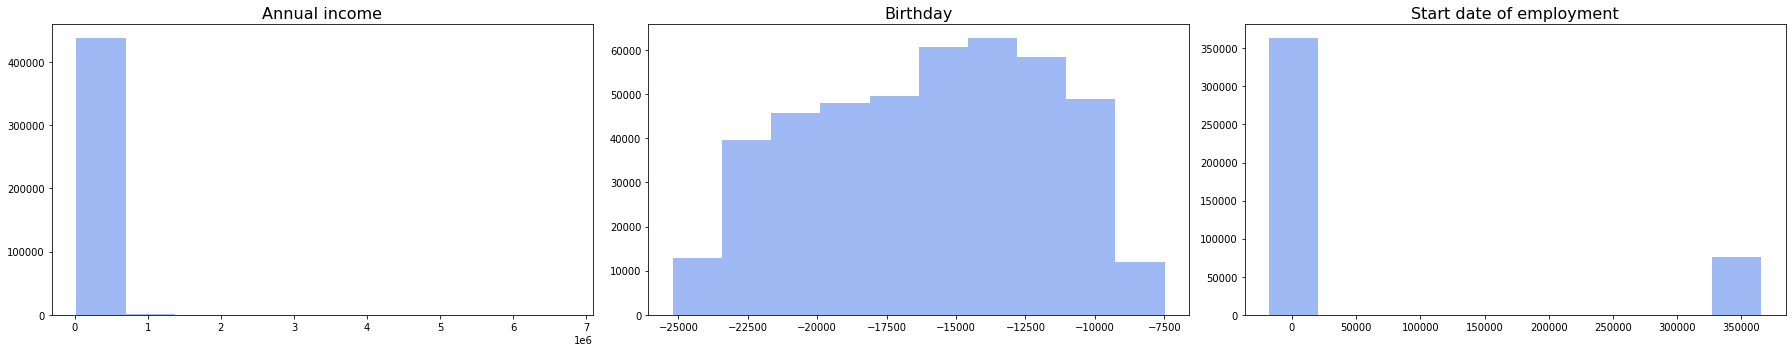

In [51]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(25,5)

axes[0].hist(app_records['AMT_INCOME_TOTAL'],color='#9eb9f3')
axes[0].set_title('Annual income',fontsize = 16)

axes[1].hist(app_records['DAYS_BIRTH'], color='#9eb9f3')
axes[1].set_title('Birthday',fontsize = 16)

axes[2].hist(app_records['DAYS_EMPLOYED'], color='#9eb9f3')
axes[2].set_title('Start date of employment',fontsize = 16)

plt.tight_layout()
plt.show()

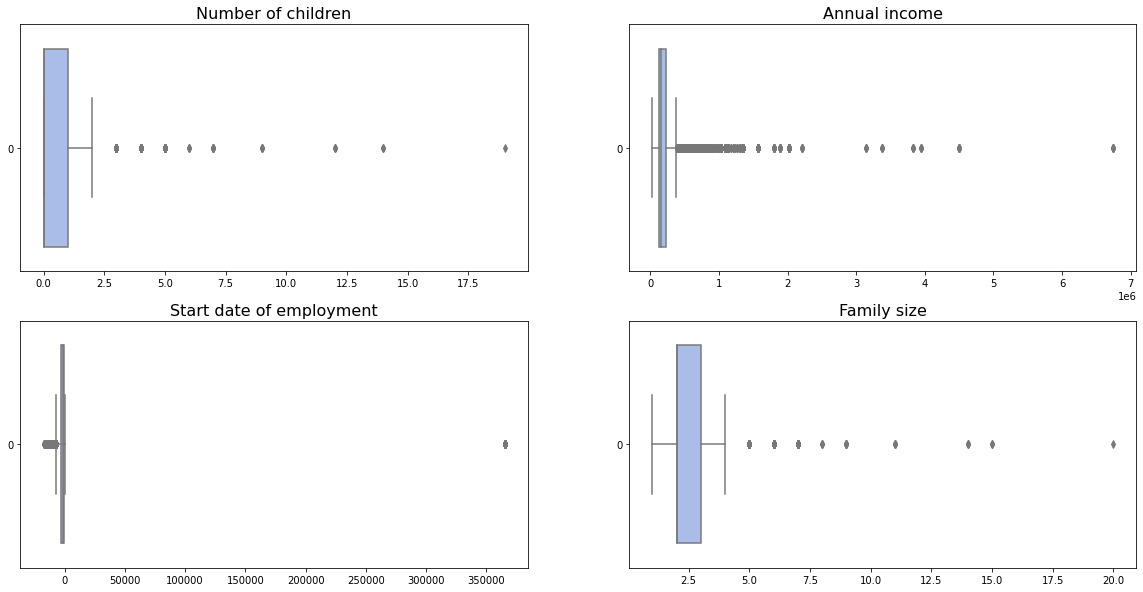

In [52]:
#Check Outliers

fig, axes = plt.subplots(2,2)
fig.set_size_inches(20,10)

sns.boxplot(data=app_records['CNT_CHILDREN'], orient="h", color="#9eb9f3",ax=axes[0][0])
axes[0][0].set_title('Number of children',fontsize = 16)

sns.boxplot(data=app_records['AMT_INCOME_TOTAL'], orient="h", color="#9eb9f3",ax=axes[0][1])
axes[0][1].set_title('Annual income',fontsize = 16)

sns.boxplot(data=app_records['DAYS_EMPLOYED'], orient="h", color="#9eb9f3",ax=axes[1][0])
axes[1][0].set_title('Start date of employment',fontsize = 16)

sns.boxplot(data=app_records['CNT_FAM_MEMBERS'], orient="h", color="#9eb9f3",ax=axes[1][1])
axes[1][1].set_title('Family size',fontsize = 16)

plt.show()

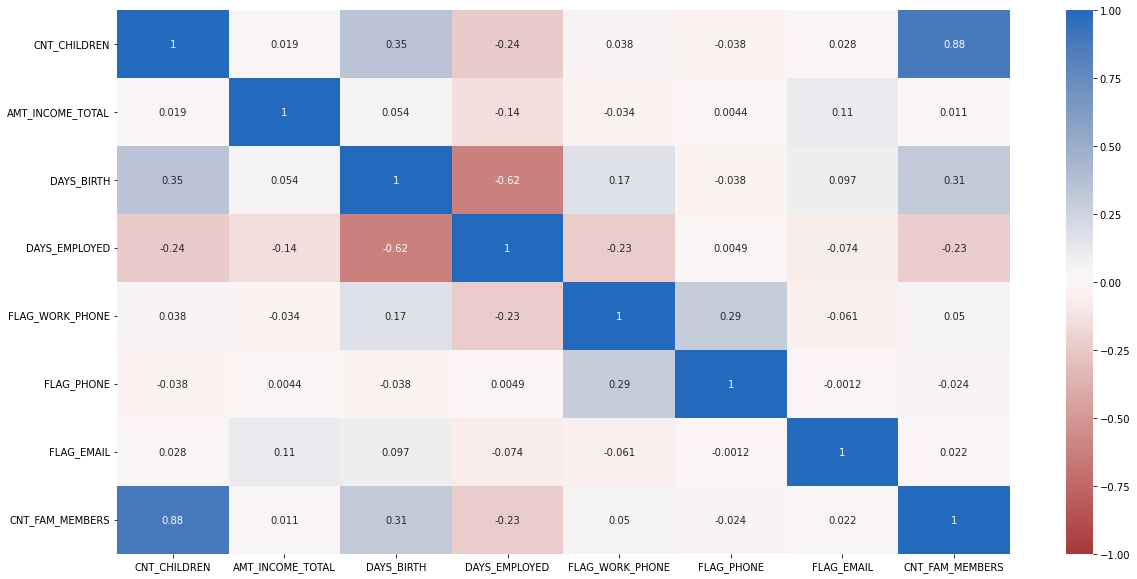

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
heatmap = sns.heatmap(app_records.drop(columns=['ID','FLAG_MOBIL']).corr(), vmin=-1, vmax=1, annot=True,cmap='vlag_r')

# Data Preparation

In [54]:
app_records = app_records.drop_duplicates('ID', keep='last') #Remove Duplicate and Keep last row
app_records = app_records.drop(columns=['OCCUPATION_TYPE']) #Drop OCCUPATION_TYPE Because It has many null values
app_records = app_records.drop(columns=['FLAG_MOBIL']) #Drop FLAG_MOBIL Because it has one value for all 

In [55]:
#Encode Object Columns

app_records['CODE_GENDER'] = app_records['CODE_GENDER'].map({'M':0,'F':1})
app_records['FLAG_OWN_CAR'] = app_records['FLAG_OWN_CAR'].map({'N':0,'Y':1})
app_records['FLAG_OWN_REALTY'] = app_records['FLAG_OWN_REALTY'].map({'N':0,'Y':1})

app_records['NAME_FAMILY_STATUS'] = app_records['NAME_FAMILY_STATUS'].map({'Civil marriage':1,'Married':1,'Single / not married':0,'Separated':0,'Widow':0})
app_records.rename(columns = {'NAME_FAMILY_STATUS':'Married/Single'}, inplace = True)

encode_cols = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE']

for col in encode_cols:
    vals = list(app_records[col].unique())
    for val in vals:
        app_records[val] = np.where(app_records[col] == val, 1, 0)

app_records = app_records.drop(columns=encode_cols)

In [56]:
#Remove Outliers

child_outliers = app_records["CNT_CHILDREN"].quantile(0.99)
income_outliers = app_records["AMT_INCOME_TOTAL"].quantile(0.99)
emp_outliers = app_records["DAYS_EMPLOYED"].quantile(0.99)
fam_size_outliers = app_records["CNT_FAM_MEMBERS"].quantile(0.99)

app_records = app_records[(app_records["CNT_CHILDREN"] < child_outliers) & (app_records["AMT_INCOME_TOTAL"] < income_outliers) & (app_records["DAYS_EMPLOYED"] < emp_outliers) & (app_records["CNT_FAM_MEMBERS"] < fam_size_outliers)]

# Feature Engineering


In [57]:
#Create new Features based on pivot table from Credits Record Data
def get_features(df):
    features = pd.DataFrame()
    features['ID'] = df.index
    features['paid_off'] = df['paid_off'].values
    features['#_of_pastdues'] = df['pastdue_1-29'].values+ df['pastdue_30-59'].values + df['pastdue_60-89'].values +df['pastdue_90-119'].values+df['pastdue_120-149'].values +df['pastdue_over_150'].values
    features['no_loan'] = df['no_loan'].values
        
    return features

In [58]:
#Create Pivot Table From Credits Record Data
def get_pivot_table(credit):
    grouped = credit.groupby('ID')
    pivot_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
    pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
    pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()
    pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']
    pivot_tb['paid_off'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'C'].count(axis = 1)
    pivot_tb['pastdue_1-29'] = pivot_tb[pivot_tb.iloc[:,0:61] == '0'].count(axis = 1)
    pivot_tb['pastdue_30-59'] = pivot_tb[pivot_tb.iloc[:,0:61] == '1'].count(axis = 1)
    pivot_tb['pastdue_60-89'] = pivot_tb[pivot_tb.iloc[:,0:61] == '2'].count(axis = 1)
    pivot_tb['pastdue_90-119'] = pivot_tb[pivot_tb.iloc[:,0:61] == '3'].count(axis = 1)
    pivot_tb['pastdue_120-149'] = pivot_tb[pivot_tb.iloc[:,0:61] == '4'].count(axis = 1)
    pivot_tb['pastdue_over_150'] = pivot_tb[pivot_tb.iloc[:,0:61] == '5'].count(axis = 1)
    pivot_tb['no_loan'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'X'].count(axis = 1)
    pivot_tb['ID'] = pivot_tb.index
    
    return pivot_tb

In [59]:
#Create Target column
def get_target(credit):
    credit['target'] = None
    credit.loc[credit['STATUS'] =='2', 'target'] = 1
    credit.loc[credit['STATUS'] =='3', 'target'] = 1
    credit.loc[credit['STATUS'] =='4', 'target'] = 1
    credit.loc[credit['STATUS'] =='5', 'target'] = 1

    good_or_bad=credit.groupby('ID').count()
    good_or_bad.loc[good_or_bad['target'] > 0, 'target'] = 1
    good_or_bad.loc[good_or_bad['target'] == 0, 'target'] = 0
    good_or_bad = good_or_bad[['target']]
    
    return good_or_bad

In [60]:
#Merge to get Final Data
target = get_target(credits)
features = get_features(get_pivot_table(credits))
data = app_records.merge(features, how = 'inner', on = 'ID')
data = data.merge(target, how = 'inner', on = 'ID')

In [61]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,Married/Single,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,...,Rented apartment,House / apartment,Municipal apartment,With parents,Co-op apartment,Office apartment,paid_off,#_of_pastdues,no_loan,target
0,5008804,0,1,1,0,427500.0,1,-12005,-4542,1,...,1,0,0,0,0,0,13,2,1,0
1,5008805,0,1,1,0,427500.0,1,-12005,-4542,1,...,1,0,0,0,0,0,12,2,1,0
2,5008806,0,1,1,0,112500.0,1,-21474,-1134,0,...,0,1,0,0,0,0,7,7,16,0
3,5008808,1,0,1,0,270000.0,0,-19110,-3051,0,...,0,1,0,0,0,0,0,2,3,0
4,5008809,1,0,1,0,270000.0,0,-19110,-3051,0,...,0,1,0,0,0,0,0,0,5,0


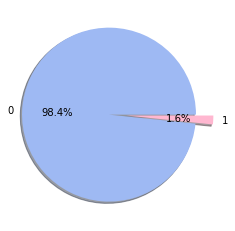

In [62]:
#Check Data balance/unbalance
plt.pie(data['target'].value_counts(),labels= list(data['target'].unique()), colors=["#9eb9f3","#ffb7d0"], explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

In [63]:
X = data.drop(columns=['ID','target'])
y = data['target']

In [64]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [65]:
sm = SMOTE(random_state=42) #Get balanced data by Over-sampling
X_res, y_res = sm.fit_resample(X, y)

# Model

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=42, test_size=0.2)

In [67]:
model = XGBClassifier(seed=42,use_label_encoder=False)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

[16:25:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [68]:
print('F-Score On Training Set : ', f1_score(y_train, y_pred_train))
print('Accuracy On Training Set : ', accuracy_score(y_train, y_pred_train))

F-Score On Training Set :  0.9968718773080766
Accuracy On Training Set :  0.9968871595330739


In [69]:
print('F-Score On Test Set : ',f1_score(y_test, y_pred_test))
print('Accuracy On Test Set : ',accuracy_score(y_test, y_pred_test))

F-Score On Test Set :  0.9927182386704362
Accuracy On Test Set :  0.9926508732491787


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


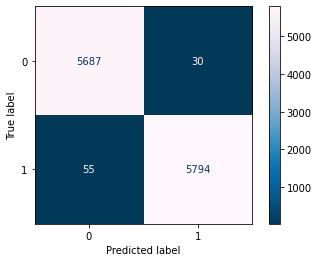

In [70]:
plot_confusion_matrix(model, X_test, y_test, cmap='PuBu_r')
plt.show()